In [1]:
from __future__ import print_function, division
import os, bz2, json, time, tqdm
from datetime import timedelta, datetime

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors

import my_util

In [2]:
# import importlib
# importlib.reload(my_util)

In [3]:
categories = ["activism","autos","comedy","education","entertainment", \
              "film","gaming","howto","movies","music",\
              "news","people","pets","science","shows",\
              "sports","trailers","travel"]
# categories = ["trailers", "movies", "shows"]

eval_days = [90, 135, 180, 225, 270]

In [4]:
# dataset_base = "G:/MLCV dataset/engagement'16/tweeted_videos" 
# dataset_base = "H:/engagement'16/tweeted_videos"
dataset_base = "/Users/zhuxinqi/Documents/online_attention/engagement'16/tweeted_videos"
# dataset_base = "G:/MLCV dataset/engagement'16/quality_videos"
dataset_jsons = {}

In [5]:
# vid -> record
dataset = {}
# category -> vids
info_category = {}
# attributes
vids_set = set()
vids = []
days = []
views = []
shares = []
watches = []
other_stats = [] # (publish time, history length)

In [6]:
for test_category in categories:
    print(test_category, "...")
    dataset_json = None
    with open(os.path.join(dataset_base, test_category+".json"), "r") as f:
        dataset_json = f.readlines()
    
    info_category[test_category] = []
    for line in tqdm.tqdm(dataset_json):
        record = json.loads(line)
        try:
            category_id = int(record['snippet']['categoryId'])
            day = [int(x) for x in record['insights']['days'].split(",")]                      
            published_at = record['snippet']['publishedAt']
            history_length = len(day)
            
            """!!! filtering"""
            if history_length < eval_days[-1]: continue
                
#             view = [int(x) for x in record['insights']['dailyView'].split(",")]
#             share = [int(x) for x in record['insights']['dailyShare'].split(",")]
#             watch = [float(x) for x in record['insights']['dailyWatch'].split(",")]
        except:
            continue
#         dataset[record['id']] = (category_id, day, view, share, watch)

        if record['id'] in vids_set:
            continue
        vids_set.add(record['id'])

        vids.append(record['id'])
#         days.append(day)
#         views.append(view)
#         shares.append(share)
#         watches.append(watch)
        
#         info_category[test_category].append(record['id'])
        
        other_stats.append((published_at, history_length))
        
print("dataset size:", len(vids))

activism ...


100%|█████████████████████████████████████████| 58787/58787 [00:01<00:00, 29628.81it/s]


autos ...


100%|█████████████████████████████████████████| 84796/84796 [00:03<00:00, 24819.36it/s]


comedy ...


100%|███████████████████████████████████████| 138068/138068 [00:05<00:00, 25017.70it/s]


education ...


100%|███████████████████████████████████████| 182849/182849 [00:07<00:00, 23990.23it/s]


entertainment ...


100%|███████████████████████████████████████| 775941/775941 [00:38<00:00, 20016.31it/s]


film ...


100%|███████████████████████████████████████| 194891/194891 [00:07<00:00, 27493.41it/s]


gaming ...


100%|██████████████████████████████████████| 1079434/1079434 [01:51<00:00, 9691.06it/s]


howto ...


100%|███████████████████████████████████████| 192931/192931 [00:08<00:00, 21888.30it/s]


movies ...


100%|█████████████████████████████████████████████| 158/158 [00:00<00:00, 19258.94it/s]


music ...


100%|███████████████████████████████████████| 449314/449314 [00:25<00:00, 17870.97it/s]


news ...


100%|███████████████████████████████████████| 459728/459728 [00:18<00:00, 24936.82it/s]


people ...


100%|█████████████████████████████████████| 1265805/1265805 [02:00<00:00, 10526.95it/s]


pets ...


100%|█████████████████████████████████████████| 27505/27505 [00:01<00:00, 25734.46it/s]


science ...


100%|███████████████████████████████████████| 110635/110635 [00:04<00:00, 23972.19it/s]


shows ...


100%|███████████████████████████████████████████| 1457/1457 [00:00<00:00, 21542.39it/s]


sports ...


100%|███████████████████████████████████████| 243650/243650 [00:09<00:00, 25930.77it/s]


trailers ...


100%|█████████████████████████████████████████████| 100/100 [00:00<00:00, 20858.88it/s]


travel ...


100%|█████████████████████████████████████████| 65155/65155 [00:02<00:00, 27336.23it/s]

dataset size: 1084326


#### Stat

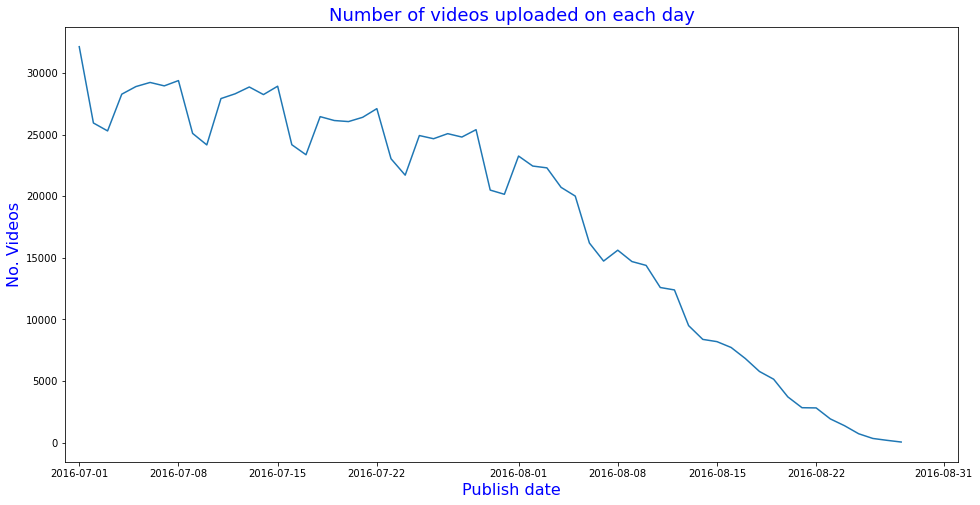

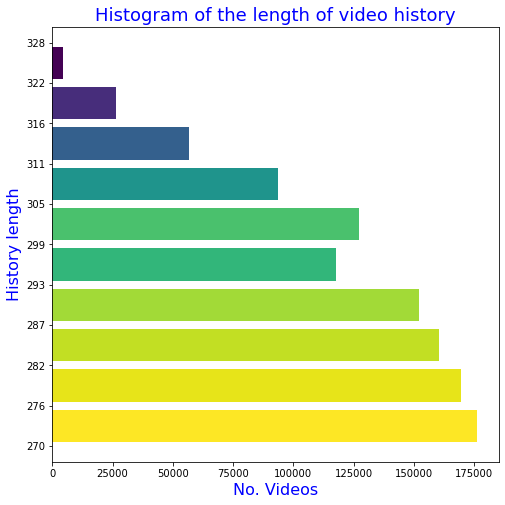

In [8]:
# number of videos uploaded on each day, 
# and the histogram of the length of available history

day_videos_map = dict()
for published_at, _ in other_stats:
    published_at = datetime.strptime(published_at,"%Y-%m-%dT%H:%M:%S.%f%z")
    published_date = published_at.date()
    if published_date not in day_videos_map:
        day_videos_map[published_date] = 0
    day_videos_map[published_date] += 1
day_videos = sorted(day_videos_map.items(), key=lambda x: x[0])

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(111)
ax.plot([x[0] for x in day_videos], [x[1] for x in day_videos])
ax.set_ylabel("No. Videos", color="blue", fontsize=16)
ax.set_xlabel("Publish date", color="blue", fontsize=16)
ax.set_title("Number of videos uploaded on each day", color="blue", fontsize=18)
magic_dates = [16983, 16990, 16997, 17004, 17014, 17021, 17028, 17035, 17044]
ax.set_xlim(magic_dates[0]-1, magic_dates[-1]+1)
ax.set_xticks(magic_dates)
plt.savefig('figs/profile_engage16/no_videos_upload_each_day(min-length).png', bbox_inches='tight')

fig2 = plt.figure(figsize = (8,8))
ax2 = fig2.add_subplot(111)
n, bins, patches = ax2.hist([x[1] for x in other_stats],orientation="horizontal", rwidth=0.8)
# compute bar color
percent = n / n.max()
norm = colors.Normalize(percent.min(), percent.max())
for thisfrac, thispatch in zip(percent, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
ax2.set_yticks(bins)
ax2.set_xlabel("No. Videos", color="blue", fontsize=16)
ax2.set_ylabel("History length", color="blue", fontsize=16)
ax2.set_title("Histogram of the length of video history", color="blue", fontsize=18)
ax2.set_yticklabels([round(x) for x in ax2.get_yticks()]) # beautify but inaccurate
plt.savefig('figs/profile_engage16/hist_video_history_length(min-length).png', bbox_inches='tight')
pass

In [ ]:
for key, val in info_category.items():
    print(key, len(val))

In [ ]:
print("Min days",np.min([len(x) for x in days]))
print("Max days",np.max([len(x) for x in days]))
print("Average days",np.average([len(x) for x in days]))

#### Analysis

In [ ]:
df_total_views_log = my_util.total_log_at(eval_days, views, vids, accumulate=False)

In [ ]:
fig = plt.figure(figsize=(12, 15))
title = "All categories ({}/{})".format(len(df_total_views_log.index), len(vids))
my_util.plot_fixed_window(eval_days, df_total_views_log, test_category, fig,\
                          title, average_daily=True)
plt.savefig('figs/avg/all.png', bbox_inches='tight')

In [ ]:
# fig = plt.figure(figsize=(12, 15))
# title = "All categories ({}/{})".format(len(df_total_views_log.index), len(vids))
# my_util.plot_fixed_window(eval_days, df_total_views_log, test_category, fig,\
#                           title, average_daily=False)
# plt.savefig('figs/total/all.png', bbox_inches='tight')

In [ ]:
# info_category["all_vids"] = vids
# with open("./category_vids.json", "w") as f:
#     json.dump(info_category, f)